In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the data and take a look at it

In [2]:
data = pd.read_csv("data/StudentsPerformance.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Answer some questions using visualizations

## Gender Percentage

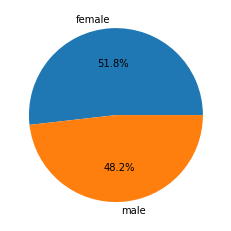

In [18]:
plt.pie(data.gender.value_counts(), labels=data.gender.value_counts().index, autopct='%1.1f%%'); # autopct to write percentages

## Distribution of math, reading, writing scores

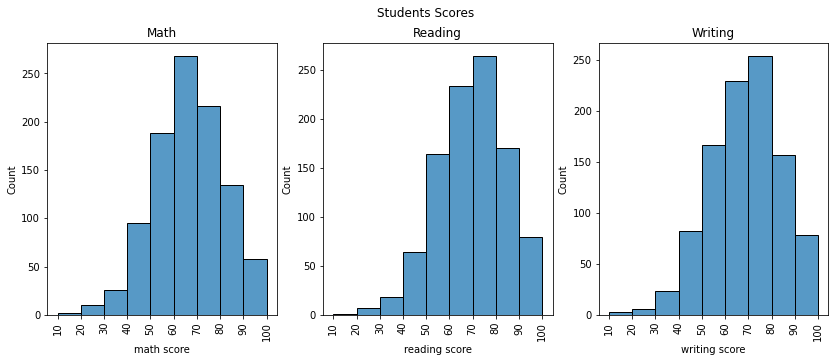

In [33]:
plt.figure(figsize = (14,5))
plt.subplot(1,3,1)
sns.histplot(data['math score'], bins = np.arange(10,110, 10))
plt.xticks(np.arange(10,110, 10), rotation = 'vertical' )
plt.title("Math")

plt.subplot(1,3,2)
sns.histplot(data['reading score'], bins = np.arange(10,110, 10))
plt.xticks(np.arange(10,110, 10), rotation = 'vertical' )
plt.title("Reading")

plt.subplot(1,3,3)
sns.histplot(data['writing score'], bins = np.arange(10,110, 10))
plt.xticks(np.arange(10,110, 10), rotation = 'vertical' )
plt.title("Writing")

plt.suptitle("Students Scores");

## Average all scores in one column and compare the performance of different categories

In [50]:
# Creating the average column

data['average'] = data.apply(lambda x : round(np.mean([x['math score'], x['writing score'], x['reading score']]), 1), axis = 1)

In [51]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3
4,male,group C,some college,standard,none,76,78,75,76.3
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.0
996,male,group C,high school,free/reduced,none,62,55,55,57.3
997,female,group C,high school,free/reduced,completed,59,71,65,65.0
998,female,group D,some college,standard,completed,68,78,77,74.3


### Average Score per Ethnicity

<AxesSubplot:xlabel='race/ethnicity'>

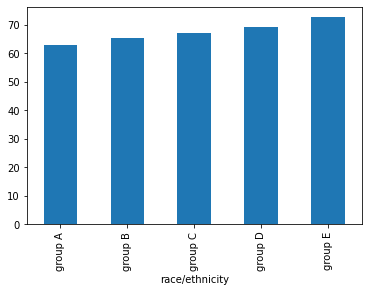

In [55]:
data.groupby("race/ethnicity").average.mean().plot(kind = 'bar')   # df.plot : plots all columns against the index

### Count of students based on Ethnicity

/home/zein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

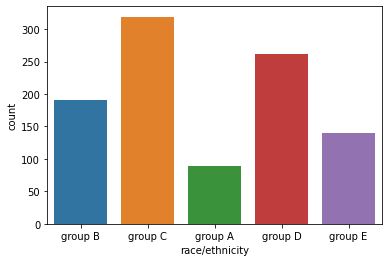

In [57]:
sns.countplot(data['race/ethnicity'])

### Count the students based on the parental education

/home/zein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


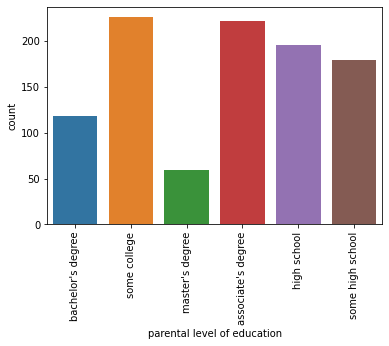

In [62]:
sns.countplot(data['parental level of education'])
plt.xticks(rotation = 'vertical');

### Score based on parental education

<AxesSubplot:xlabel='parental level of education'>

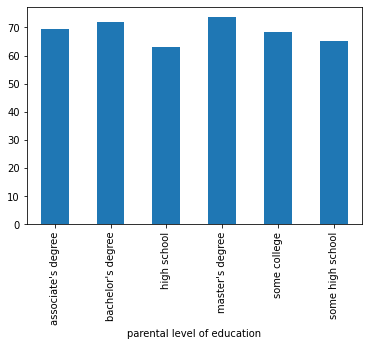

In [70]:
data.groupby("parental level of education").average.mean().plot(kind = 'bar')

###  Which gender has a better at score on average

<AxesSubplot:xlabel='gender', ylabel='average'>

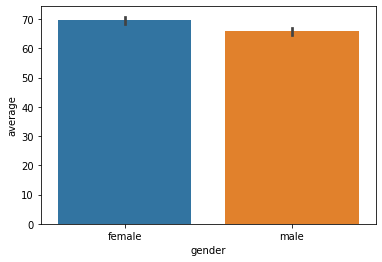

In [72]:
sns.barplot(y = 'average', x = 'gender', data = data)

 ### Comparison between genders on every material

Text(0.5, 1.0, 'Reading')

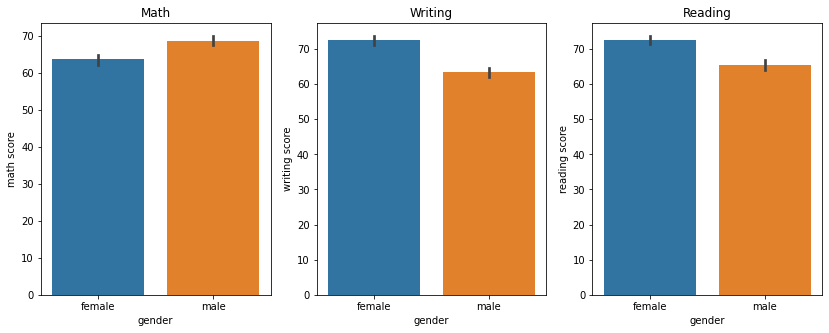

In [79]:
plt.figure(figsize = (14,5))
plt.subplot(1,3,1)
sns.barplot(x= 'gender', y = 'math score', data = data )
plt.title("Math")

plt.subplot(1,3,2)
sns.barplot(x= 'gender', y = 'writing score', data = data )
plt.title("Writing")

plt.subplot(1,3,3)
sns.barplot(x= 'gender', y = 'reading score', data = data )
plt.title("Reading")

## Box plots

### Destribution of average scores based on preparation

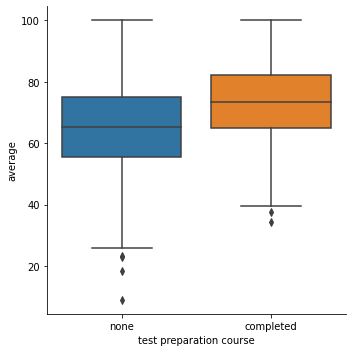

In [81]:
sns.catplot(x = 'test preparation course', y = 'average', data = data, kind = 'box')

### Math score based on parental education

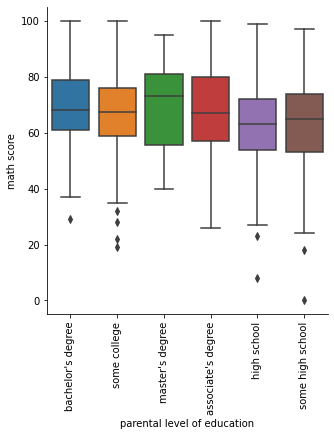

In [83]:
sns.catplot(x = 'parental level of education', y = 'math score', data = data, kind = 'box')
plt.xticks(rotation = 'vertical');

## Scatter plot (correlation between math and general score)

<AxesSubplot:xlabel='average', ylabel='math score'>

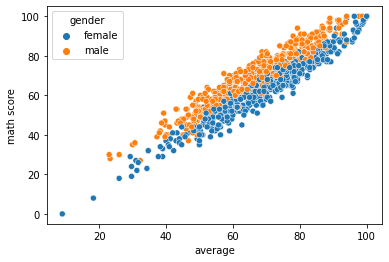

In [84]:
sns.scatterplot(x = 'average', y = 'math score', hue = 'gender', data = data)

## Facet Grid

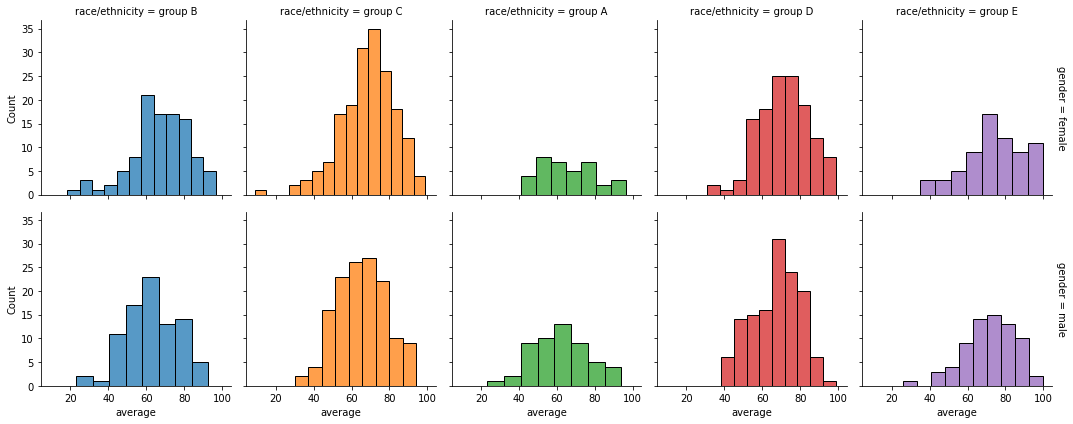

In [96]:
fg = sns.FacetGrid(col = 'race/ethnicity', row = 'gender', data = data, hue = 'race/ethnicity', margin_titles = True)
fg.map(sns.histplot, 'average');